In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt



Data & Period:

EURUSD:  01/03/2000 - 09/14/2018


### Financial Indicators

Momentum:
RSI, SO

Volatility:
ATR

Trend:
EMA

### Candlestick

High

Low

Open

Close

T1D - Trend 1 day




In [ ]:
toFloat = lambda x: float(x.replace(',', '.')) if x!='missing' else -1
toFloat_Var = lambda x: float(x.replace(',','.').replace('%', ''))/100 if x!='missing' else -1

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount = True)

import sys

sys.path.append('drive/My Drive/Seminario Redes Neurais')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('drive/My Drive/Seminario Redes Neurais/EUR_USD Dados Históricos.csv', converters={'Último': toFloat, 'Abertura': toFloat, 'Máxima': toFloat, 'Mínima': toFloat, 'Var%': toFloat_Var})

In [ ]:
# Reversing the order
df = df.loc[::-1].reset_index(drop=True)

In [ ]:
display(df.head())
display(df.tail())

,Data,Último,Abertura,Máxima,Mínima,Var%
0,08.12.1999,1.0273,1.0254,1.0290,1.0222,0.0019
1,09.12.1999,1.0208,1.0280,1.0286,1.0152,-0.0063
2,10.12.1999,1.0129,1.0213,1.0227,1.0112,-0.0077
3,13.12.1999,1.0139,1.0137,1.0164,1.0105,0.0010
4,14.12.1999,1.0059,1.0143,1.0150,1.0025,-0.0079


,Data,Último,Abertura,Máxima,Mínima,Var%
4893,10.09.2018,1.1594,1.1560,1.1617,1.1526,0.0035
4894,11.09.2018,1.1607,1.1594,1.1645,1.1565,0.0011
4895,12.09.2018,1.1626,1.1604,1.1651,1.1570,0.0016
4896,13.09.2018,1.1690,1.1627,1.1703,1.1608,0.0055
4897,14.09.2018,1.1630,1.1690,1.1724,1.1619,-0.0051


In [ ]:
# The dataset contains 18 days before day 01-03-2000 to calculate financial indicators with 3,5,8,12 and 18 lag days 
data = df[18:]

In [ ]:
display(data.head())
display(data.tail())

,Data,Último,Abertura,Máxima,Mínima,Var%
18,03.01.2000,1.0265,1.0052,1.0282,1.0050,0.0189
19,04.01.2000,1.0312,1.0244,1.0347,1.0213,0.0046
20,05.01.2000,1.0316,1.0295,1.0404,1.0282,0.0004
21,06.01.2000,1.0324,1.0325,1.0419,1.0275,0.0008
22,07.01.2000,1.0292,1.0327,1.0333,1.0252,-0.0031


,Data,Último,Abertura,Máxima,Mínima,Var%
4893,10.09.2018,1.1594,1.1560,1.1617,1.1526,0.0035
4894,11.09.2018,1.1607,1.1594,1.1645,1.1565,0.0011
4895,12.09.2018,1.1626,1.1604,1.1651,1.1570,0.0016
4896,13.09.2018,1.1690,1.1627,1.1703,1.1608,0.0055
4897,14.09.2018,1.1630,1.1690,1.1724,1.1619,-0.0051


In [ ]:
n_days = len(data.index)
print(n_days)

4880


In [ ]:
# Extracting Open, Close, High and Low from data
Open = data['Abertura'].values
Close = data['Último'].values
High = data['Máxima'].values
Low = data['Mínima'].values

In [ ]:
# Getting T1D from df
T1D = []

for i in range(n_days):
    if df['Último'].values[i+18] - df['Último'].values[i+17] > 0:
        T1D.append(1)
    else:
        T1D.append(-1)
T1D = np.array(T1D)


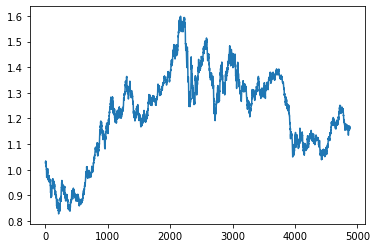

In [ ]:
plt.plot(Close)

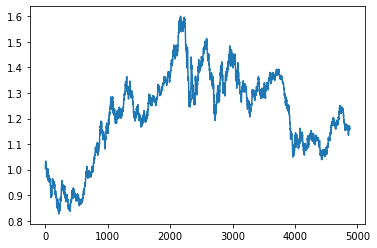

In [ ]:
plt.plot(Open)

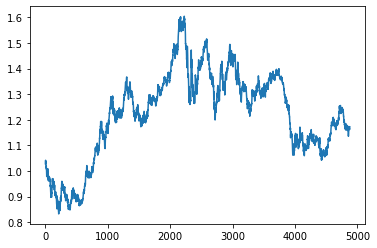

In [ ]:
plt.plot(High)

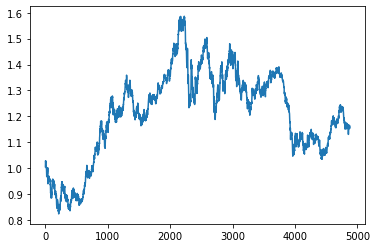

In [ ]:
plt.plot(Low)

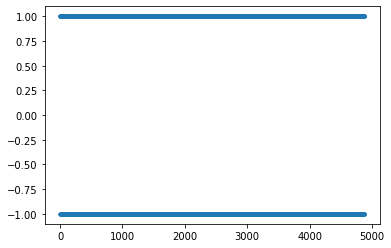

In [ ]:
plt.plot(T1D,'.')

Lag Days: 3, 5, 8, 12, 18 days

In [ ]:
lag_days = [3,5,8,12,18]

In [ ]:
# def calculate_RSI(time_series, last_n_days):
#     RSI = []
#     for day in range(4880):
#         gains = []
#         losses = []
#         for days_before in range(last_n_days+1):
#             price_change = time_series[18+day-days_before]-time_series[17+day-days_before]
#             if price_change > 0:
#                 gains.append(price_change)
#                 losses.append(0)
#             elif price_change < 0:
#                 gains.append(0)
#                 losses.append(-price_change)
#             else:
#                 gains.append(0)
#                 losses.append(0)
#         avg_gain = sum(gains)/last_n_days
#         avg_loss = sum(losses)/last_n_days
#         if avg_loss == 0:
#             RS = 0
#         else:
#             RS = avg_gain/avg_loss
#         RSI.append(100 - (100/(1+RS)))
        
#     return RSI

In [ ]:
def calculate_RSI(dataframe, last_n_days):

  RSI = []
  for day in range(4880):
      gains = []
      losses = []
      for days_before in range(last_n_days+1):
          price_change = df['Var%'].values[day+18-days_before]
          if price_change > 0:
              gains.append(price_change)
              losses.append(0)
          elif price_change <= 0:
              gains.append(0)
              losses.append(-price_change)

      avg_gain = sum(gains)/last_n_days
      avg_loss = sum(losses)/last_n_days
      if avg_loss == 0:
          RS = 0
      else:
          RS = avg_gain/avg_loss
      RSI.append(100 - (100/(1+RS)))
      
  return RSI

In [ ]:
RSIs = []
for lag in lag_days:
    RSIs.append(calculate_RSI(df, lag))


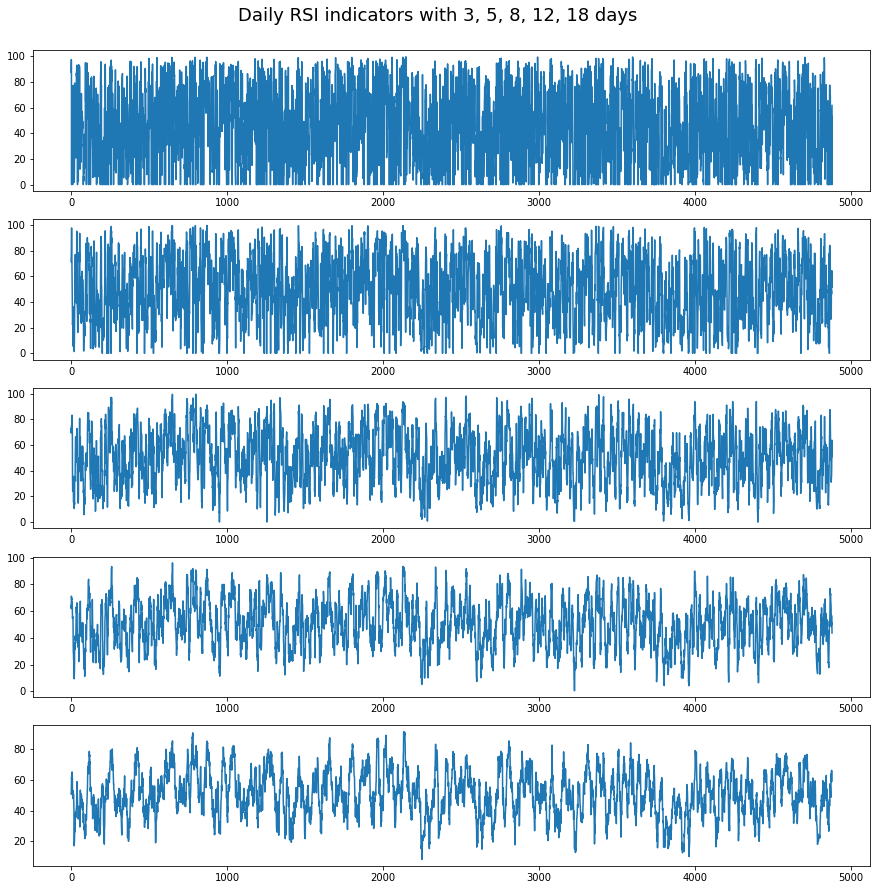

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
# plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily RSI indicators with 3, 5, 8, 12, 18 days", fontsize=18, y=0.92)


for i, rsi in enumerate(RSIs):
    axs[i].plot(rsi)

    # chart formatting
#     axs[i].set_title()
#     axs[i].get_legend().remove()
#     ax.set_xlabel("")

plt.show()

In [ ]:
def calculate_SO(dataframe, last_n_days):
    SO = []
    for day in range(4880):
        C = dataframe['Último'].values[18+day]
        H = np.amax(dataframe['Máxima'].values[18+day-last_n_days:18+day+1])
        L = np.amin(dataframe['Mínima'].values[18+day-last_n_days:18+day+1])
    
        SO.append(((C-L)/(H-L)) * 100)
    
    return SO            

In [ ]:
SOs = []
for lag in lag_days:
    SOs.append(calculate_SO(df, lag))

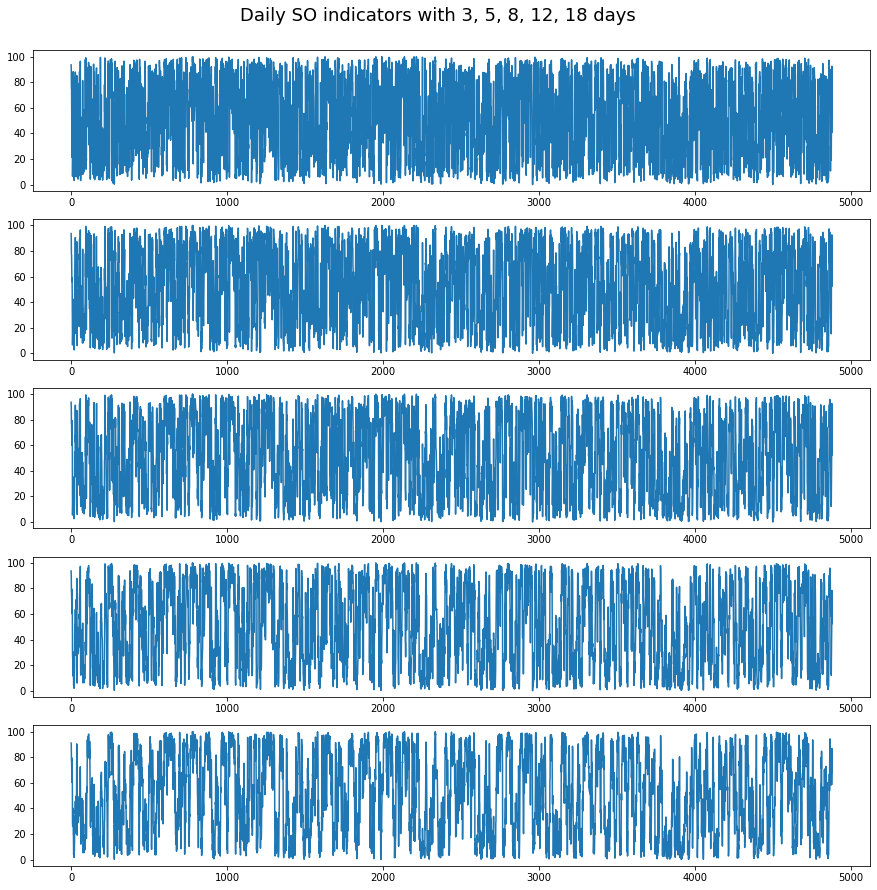

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
# plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily SO indicators with 3, 5, 8, 12, 18 days", fontsize=18, y=0.92)


for i, so in enumerate(SOs):
    axs[i].plot(so)

    # chart formatting
#     axs[i].set_title()
#     axs[i].get_legend().remove()
#     ax.set_xlabel("")

plt.show()

In [ ]:
def calculate_ATR(dataframe, last_n_days):
    ATR = []
    for day in range(4880):
        TR = []
        for days_before in range(last_n_days):
            H = dataframe['Máxima'].values[18+day-days_before]
            L = dataframe['Mínima'].values[18+day-days_before]
            Cp = dataframe['Último'].values[17+day-days_before]
            TR.append(max([H-L, abs(H-Cp), abs(L-Cp)]))
        ATR.append(np.mean(TR))
    return ATR

In [ ]:
ATRs = []
for lag in lag_days:
    ATRs.append(calculate_ATR(df, lag))

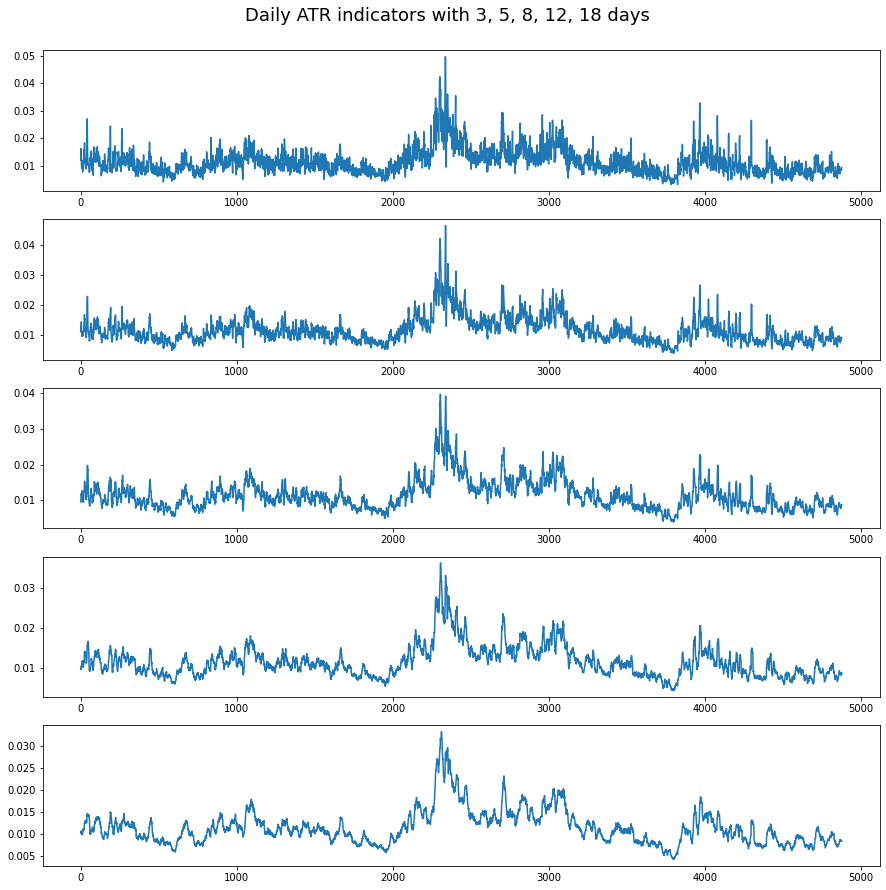

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
# plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily ATR indicators with 3, 5, 8, 12, 18 days", fontsize=18, y=0.92)


for i, atr in enumerate(ATRs):
    axs[i].plot(atr)

    # chart formatting
#     axs[i].set_title()
#     axs[i].get_legend().remove()
#     ax.set_xlabel("")

plt.show()

In [ ]:
def calculate_EMA(dataframe, last_n_days):
    k = 2/(last_n_days + 1)
    EMA = [np.mean(dataframe['Último'].values[18-last_n_days:18+1])]
    for day in range(1,4880):
        price_today = dataframe['Último'].values[18+day]
        EMA.append(k*price_today + (1-k)*EMA[day-1])
    
    return EMA 

In [ ]:
EMAs = []
for lag in lag_days:
    EMAs.append(calculate_EMA(df, lag))

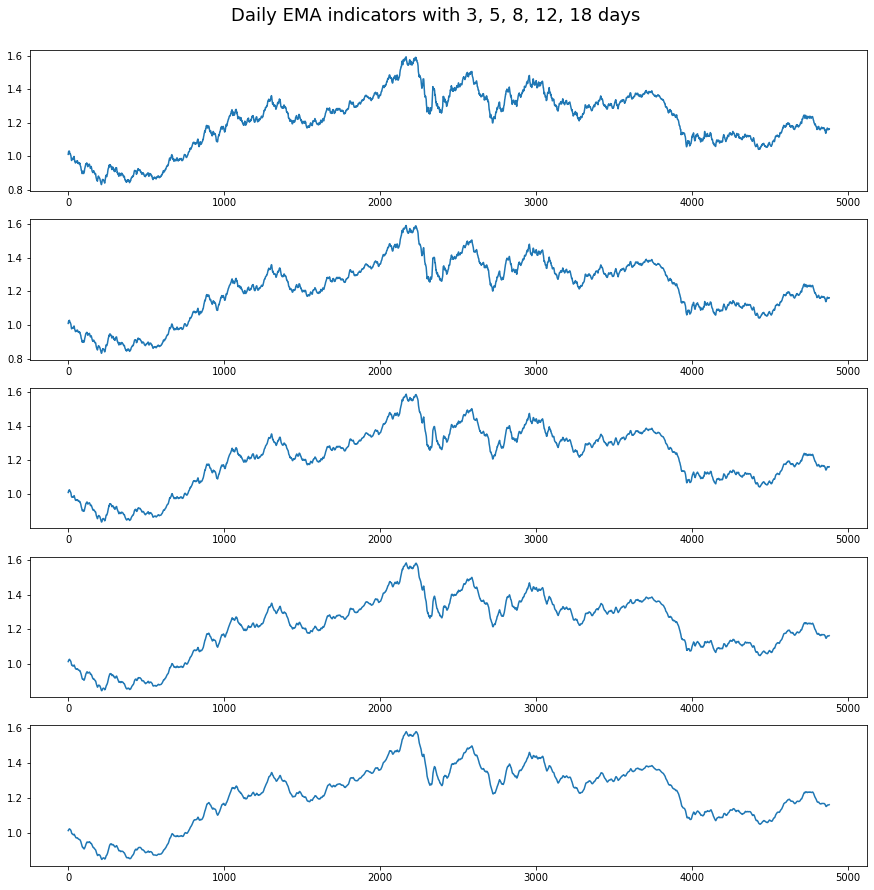

In [ ]:
fig, axs = plt.subplots(5, 1, figsize=(15, 15))
# plt.subplots_adjust(hspace=0.5)
fig.suptitle("Daily EMA indicators with 3, 5, 8, 12, 18 days", fontsize=18, y=0.92)


for i, ema in enumerate(EMAs):
    axs[i].plot(ema)

    # chart formatting
#     axs[i].set_title()
#     axs[i].get_legend().remove()
#     ax.set_xlabel("")

plt.show()

In [ ]:
def value_to_gray(time_series):
    gray_time_series = []
    Max = np.amax(time_series)
    Min = np.amin(time_series)
    for value in time_series:
        gray = ((value - Min)/(Max-Min)) * (255-0) + 0
        gray_time_series.append(gray)
    
    return gray_time_series

In [ ]:
gray_Close = value_to_gray(Close)
gray_Open = value_to_gray(Open)
gray_High = value_to_gray(High)
gray_Low = value_to_gray(Low)
gray_T1D = value_to_gray(T1D)

gray_RSI = []
gray_SO = []
gray_ATR = []
gray_EMA = []

for i in range(5):
    gray_RSI.append(value_to_gray(RSIs[i]))
    gray_SO.append(value_to_gray(SOs[i]))
    gray_ATR.append(value_to_gray(ATRs[i]))
    gray_EMA.append(value_to_gray(EMAs[i]))

In [ ]:
Images = []
for day in range(4880):
    image = []
    for i in range(5):
        row1 = []
        row2 = []
        row3 = []
        row4 = []
        for j in range(5):
            row1.append(gray_RSI[j][day])
            row2.append(gray_SO[j][day])
            row3.append(gray_ATR[j][day])
            row4.append(gray_EMA[j][day])
    image.append(row1)
    image.append(row2)
    image.append(row3)
    image.append(row4)
    image.append([gray_Open[day], gray_High[day], gray_Low[day], gray_Close[day], gray_T1D[day]])
    Images.append(image)

In [ ]:
Images = np.array(Images)/255

In [ ]:
len(Images)

4880

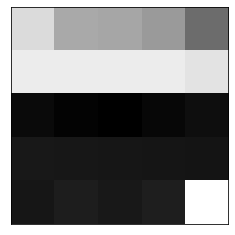

In [ ]:
fig = plt.imshow(np.array(Images[0]), cmap = 'gray',)
fig.axes.get_xaxis().set_visible(False)
fig.axes.get_yaxis().set_visible(False)

In [ ]:
labels = []
for day in range(4880-1):
    if Close[day+1] - Open[day+1] > 0:
        labels.append(1)
    else:
        labels.append(0)

In [ ]:
labels = np.array(labels)
len(labels)

4879

In [ ]:
# def create_img(df):
#     Images = []
#     for day in range(4880):
#         image = []
#         for i in range(5):
#             row1 = []
#             row2 = []
#             row3 = []
#             row4 = []
#             for j in range(5):
#                 row1.append(gray_RSI[j][day])
#                 row2.append(gray_SO[j][day])
#                 row3.append(gray_ATR[j][day])
#                 row4.append(gray_EMA[j][day])
#         image.append(row1)
#         image.append(row2)
#         image.append(row3)
#         image.append(row4)
#         image.append([gray_Open[day], gray_High[day], gray_Low[day], gray_Close[day], gray_T1D[day]])
#         Images.append(image)

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; train &emsp; &emsp; &emsp; &emsp; &emsp;test
  
scenario 1:  &emsp; &emsp; 2000,2001,2002 &emsp; &emsp; &emsp; 2003

scenario 2:  &emsp; &emsp; 2003,2004,2005 &emsp; &emsp; &emsp; 2006

scenario 3:  &emsp; &emsp; 2006,2007,2008 &emsp; &emsp; &emsp; 2009

scenario 4:  &emsp; &emsp; 2009,2010,2011 &emsp; &emsp; &emsp; 2012

scenario 5:  &emsp; &emsp; 2012,2013,2014 &emsp; &emsp; &emsp; 2015

scenario 6:  &emsp; &emsp; 2015,2016,2017 &emsp; &emsp; &emsp; 2018

&emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp;train &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; &emsp; test

scenario 7: &emsp; 2000,2001,2002,2003,2004,2005,2006,2007 &emsp; 2008,2009,2010

scenario 8: &emsp; 2008,2009,2010,2011,2012,2013,2014,2015 &emsp; 2016,2017,2018

year  &emsp; &emsp; &emsp; first day &emsp; &emsp;&emsp; index in df

2000&emsp; &emsp; &emsp;03.01.2000 &emsp; &emsp; &emsp;18

2001&emsp; &emsp; &emsp;01.01.2001 &emsp; &emsp; &emsp;278

2002&emsp; &emsp; &emsp;01.01.2002 &emsp; &emsp; &emsp;539

2003&emsp; &emsp; &emsp;01.01.2003 &emsp; &emsp; &emsp;800

2004&emsp; &emsp; &emsp;01.01.2004 &emsp; &emsp; &emsp;1061

2005&emsp; &emsp; &emsp;03.01.2005 &emsp; &emsp; &emsp;1323

2006&emsp; &emsp; &emsp;02.01.2006 &emsp; &emsp; &emsp;1583

2007&emsp; &emsp; &emsp;01.01.2007 &emsp; &emsp; &emsp;1843

2008&emsp; &emsp; &emsp;01.01.2008 &emsp; &emsp; &emsp;2104

2009&emsp; &emsp; &emsp;01.01.2009 &emsp; &emsp; &emsp;2366

2010&emsp; &emsp; &emsp;01.01.2010 &emsp; &emsp; &emsp;2627

2011&emsp; &emsp; &emsp;03.01.2011 &emsp; &emsp; &emsp;2888

2012&emsp; &emsp; &emsp;02.01.2012 &emsp; &emsp; &emsp;3148

2013&emsp; &emsp; &emsp;01.01.2013 &emsp; &emsp; &emsp;3409

2014&emsp; &emsp; &emsp;01.01.2014 &emsp; &emsp; &emsp;3670

2015&emsp; &emsp; &emsp;01.01.2015 &emsp; &emsp; &emsp;3931

2016&emsp; &emsp; &emsp;01.01.2016 &emsp; &emsp; &emsp;4192

2017&emsp; &emsp; &emsp;02.01.2017 &emsp; &emsp; &emsp;4453

2018&emsp; &emsp; &emsp;01.01.2018  &emsp; &emsp; &emsp;4713

year  &emsp; &emsp; &emsp; last day &emsp; &emsp; &emsp; index in df

2018&emsp; &emsp; &emsp;14.09.2018 &emsp; &emsp; &emsp;4897

In [ ]:
print(data[data['Data']=='03.01.2000'].index.values[0])
print(data[data['Data']=='01.01.2001'].index.values[0])
print(data[data['Data']=='01.01.2002'].index.values[0])
print(data[data['Data']=='01.01.2003'].index.values[0])
print(data[data['Data']=='01.01.2004'].index.values[0])
print(data[data['Data']=='03.01.2005'].index.values[0])
print(data[data['Data']=='02.01.2006'].index.values[0])
print(data[data['Data']=='01.01.2007'].index.values[0])
print(data[data['Data']=='01.01.2008'].index.values[0])
print(data[data['Data']=='01.01.2009'].index.values[0])
print(data[data['Data']=='01.01.2010'].index.values[0])
print(data[data['Data']=='03.01.2011'].index.values[0])
print(data[data['Data']=='02.01.2012'].index.values[0])
print(data[data['Data']=='01.01.2013'].index.values[0])
print(data[data['Data']=='01.01.2014'].index.values[0])
print(data[data['Data']=='01.01.2015'].index.values[0])
print(data[data['Data']=='01.01.2016'].index.values[0])
print(data[data['Data']=='02.01.2017'].index.values[0])
print(data[data['Data']=='01.01.2018'].index.values[0])
print(data[data['Data']=='14.09.2018'].index.values[0])

18
278
539
800
1061
1323
1583
1843
2104
2366
2627
2888
3148
3409
3670
3931
4192
4453
4713
4897


In [ ]:
# indices = {
#            2000: 18,
#            2001: 278,
#            2002: 539,
#            2003: 800,
#            2004: 1061,
#            2005: 1323,
#            2006: 1584,
#            2007: 1845,
#            2008: 2104,
#            2009: 2366,
#            2010: 2627,
#            2011: 2888,
#            2012: 3148,
#            2013: 3409,
#            2014: 3670,
#            2015: 3931,
#            2016: 4192,
#            2017: 4453,
#            2018: 4713,
#            2019: 4897
# }

In [ ]:
# indices_18 = {}
# for key in indices.keys():
#   indices_18[key] = indices[key]-18
  

In [ ]:
# indices_18

In [ ]:
# def create_sliding_windows(begin_period_training, end_period_training, begin_period_test, end_period_test, shift):

#   n_years_training = end_period_training - begin_period_training + 1
#   n_years_test = end_period_test - begin_period_test + 1
#   n_years_period = n_years_training + n_years_test
#   n_scenarios = (19 - n_years_period)/shift + 1
#   sliding_windows = []

#   for i in range(int(n_scenarios)):
#     training_data = [ Images[ indices_18[begin_period_training+i*shift]:indices_18[end_period_training+i*shift+1] ], labels[ indices_18[begin_period_training+i*shift]:indices_18[end_period_training+i*shift+1] ] ]
#     test_data = [ Images[ indices_18[begin_period_test+i*shift]:indices_18[end_period_test+i*shift+1] ], labels[ indices_18[begin_period_test+i*shift]:indices_18[end_period_test+i*shift+1] ] ]
#     sliding_windows.append([training_data, test_data])
#   return sliding_windows


In [ ]:
# def create_expanding_windows(begin_period_training, end_period_training, begin_period_test, end_period_test, expand):

#   n_years_training = end_period_training - begin_period_training + 1
#   n_years_test = end_period_test - begin_period_test + 1
#   n_years_period = n_years_training + n_years_test
#   n_scenarios = (19 - n_years_period)/shift + 1
#   sliding_windows = []

#   for i in range(int(n_scenarios)):
#     training_data = [ Images[ indices_18[begin_period_training+i*shift]:indices_18[end_period_training+i*shift+1] ], labels[ indices_18[begin_period_training+i*shift]:indices_18[end_period_training+i*shift+1] ] ]
#     test_data = [ Images[ indices_18[begin_period_test+i*shift]:indices_18[end_period_test+i*shift+1] ], labels[ indices_18[begin_period_test+i*shift]:indices_18[end_period_test+i*shift+1] ] ]
#     sliding_windows.append([training_data, test_data])
#   return sliding_windows

In [ ]:
# scenarios = create_sliding_windows(2000,2002,2003,2003,3)

In [ ]:
# scenarios = []
# indexes = [18, 278, 539, 800, 1061, 1323, 1584, 1845, 2104, 2366, 2627, 2888, 3148, 3409, 3670, 3931, 4192, 4453, 4713, 4898]

# for i in range(6):
#     scenarios.append([df[indexes[3*i]:indexes[3*i+3]],df[indexes[3*i+3]:indexes[3*i+4]]])
    
# for i in range(2):
#     scenarios.append([df[indexes[8*i]:indexes[8*i+8]],df[indexes[8*i+8]:indexes[8*i+11]]])

In [ ]:
# scenarios_images_labes = [scenario1, scenario2, ... , scenario8]
# scenario = [train_set, test_set]
# train_set = [images, labels]
# test_set = [images, labels]

scenarios_images_labels = []
indexes = [ 0, 260, 521, 782, 1043, 1305, 1566, 1827, 2086, 2348, 2609, 2870, 3130, 3391, 3652, 3913, 4174, 4435, 4695, 4879]

for i in range(6):
    train = [Images[indexes[2*i]:indexes[2*i+7]],labels[indexes[2*i]:indexes[2*i+7]]]
    test = [Images[indexes[2*i+7]:indexes[2*i+8]] , labels[indexes[2*i+7]:indexes[2*i+8]]]
    scenarios_images_labels.append([train, test])
    
for i in range(2):
    train = [Images[indexes[4*i]:indexes[4*i+8]],labels[indexes[4*i]:indexes[4*i+8]]]
    test = [Images[indexes[4*i+8]:indexes[4*i+10]] , labels[indexes[4*i+8]:indexes[4*i+10]]]
    scenarios_images_labels.append([train, test])


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(20, (2, 2), strides=1, activation='relu', input_shape=(5, 5, 1)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(.25))
model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 4, 4, 20)          100       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 2, 2, 20)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 80)                0         
                                                                 
 dense (Dense)               (None, 20)                1620      
                                                                 
 dropout (Dropout)           (None, 20)                0         
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                        

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
historys = []
for i in range(8):
    historys.append(model.fit(scenarios_images_labels[i][0][0], scenarios_images_labels[i][0][1], batch_size = 32, epochs=100, validation_data=(scenarios_images_labels[i][1][0], scenarios_images_labels[i][1][1])))


Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.4986 - val_loss: 0.6923 - val_accuracy: 0.5212
Epoch 2/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5156 - val_loss: 0.6916 - val_accuracy: 0.5290
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6933 - accuracy: 0.5156 - val_loss: 0.6928 - val_accuracy: 0.4942
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6926 - accuracy: 0.5255 - val_loss: 0.6911 - val_accuracy: 0.5444
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6921 - accuracy: 0.5129 - val_loss: 0.6899 - val_accuracy: 0.5328
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6928 - accuracy: 0.5079 - val_loss: 0.6901 - val_accuracy: 0.5251
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 0.6925 - accuracy: 0.5112 - val_loss: 0.6888 - val_accuracy: 0.5714
Epoch 8/100
5

In [ ]:
# # model.predict(scenarios_images_labels[0][1][0][0])
# x = scenarios_images_labels[0][1][0][0]
# _img = np.expand_dims(x, axis=0)
# _img.shape
# model.predict(_img)

In [ ]:
# predictions = model.predict(scenarios_images_labels[2][1][0])
# print(predictions)


# aux = []
# for i in range(len(predictions)):
#   if predictions[i] > 0.5:
#     aux.append(1)
#   else:
#     aux.append(0)
# predictions = aux
# print(predictions)
# tf.math.confusion_matrix(scenarios_images_labels[0][1][1],predictions)

In [ ]:
data = []
for i in range(6):
  data.append([i+1,str(2000+i*2)+'-'+str(2000+i*2+7), str(2000+i*2+8),historys[i].history['accuracy'][-1], historys[i].history['val_accuracy'][-1]])
for i in range(6,8):
  data.append([i+1,str(2000)+'-'+str(2000+(i-6)*8+8), str(2000+(i-5)*8+1)+'-'+str(2000+(i-5)*8+2),historys[i].history['accuracy'][-1], historys[i].history['val_accuracy'][-1]])


In [ ]:
results_scenarios_CNN = pd.DataFrame(data=data, columns=['Scenario', 'Training Data', 'Test Data', 'Train Accuracy', 'Test Accuracy'])
display(results_scenarios_CNN)


,Scenario,Training Data,Test Data,Train Accuracy,Test Accuracy
0,1,2000-2007,2008,0.556103,0.505791
1,2,2002-2009,2010,0.563766,0.524904
2,3,2004-2011,2012,0.593322,0.553846
3,4,2006-2013,2014,0.579178,0.482759
4,5,2008-2015,2016,0.580186,0.513410
5,6,2010-2017,2018,0.568456,0.534615
6,7,2000-2008,2009-2010,0.581496,0.543021
7,8,2000-2016,2017-2018,0.597508,0.478927


In [ ]:
results_scenarios_CNN[['Train Accuracy','Test Accuracy']].describe()

,Train Accuracy,Test Accuracy
count,8.000000,8.000000
mean,0.577502,0.517159
std,0.014167,0.027171
min,0.556103,0.478927
25%,0.567283,0.500033
50%,0.579682,0.519157
75%,0.584452,0.536717
max,0.597508,0.553846


In [ ]:
# scenarios_losses = []
# scenarios_ma_losses = []

# scenarios_val_losses = []
# scenarios_ma_val_losses = []

# scenarios_accuracys = []
# scenarios_ma_accuracys = []

# scenarios_val_accuracys = []
# scenarios_ma_val_accuracys = []

# for i in range(8):
#   scenarios_losses.append(np.array(historys[i].history['loss']))
#   scenarios_ma_losses.append(moving_average(np.array(historys[i].history['loss']), 10))

#   scenarios_val_losses.append(np.array(historys[i].history['val_loss']))
#   scenarios_ma_val_losses.append(moving_average(np.array(historys[i].history['val_loss']), 10))

#   scenarios_accuracys.append(np.array(historys[i].history['accuracy']))
#   scenarios_ma_accuracys.append(moving_average(np.array(historys[i].history['accuracy']), 10))

#   scenarios_val_accuracys.append(np.array(historys[i].history['val_accuracy']))
#   scenarios_ma_val_accuracys.append(moving_average(np.array(historys[i].history['val_accuracy']), 10))


In [ ]:
# for i in range(8):
#   fig, axs = plt.subplots(4, 1, sharey=True, figsize=(10,10))

#   axs[0].plot(historys[2].history['accuracy'])
#   axs[0].plot(ma_accuracy, label='Moving Average(10 days)')
#   axs[0].set_title('Accuracy x Epochs')
#   axs[0].set_xlabel('Epochs')
#   axs[0].set_ylabel('Accuracy')
#   axs[0].legend()

#   axs[1].plot(historys[2].history['val_accuracy'])
#   axs[1].set_title('Validation Accuracy x Epochs')
#   axs[1].set_xlabel('Epochs')
#   axs[1].set_ylabel('Accuracy')
#   axs[1].plot(ma_val_accuracy, label='Moving Average(10 days)')
#   axs[1].legend()

In [ ]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

In [ ]:
x = np.array(historys[2].history['loss'])
ma_loss = moving_average(x, 10)

x = np.array(historys[2].history['val_loss'])
ma_val_loss = moving_average(x, 10)

x = np.array(historys[2].history['accuracy'])
ma_accuracy = moving_average(x, 10)

x = np.array(historys[2].history['val_accuracy'])
ma_val_accuracy = moving_average(x, 10)

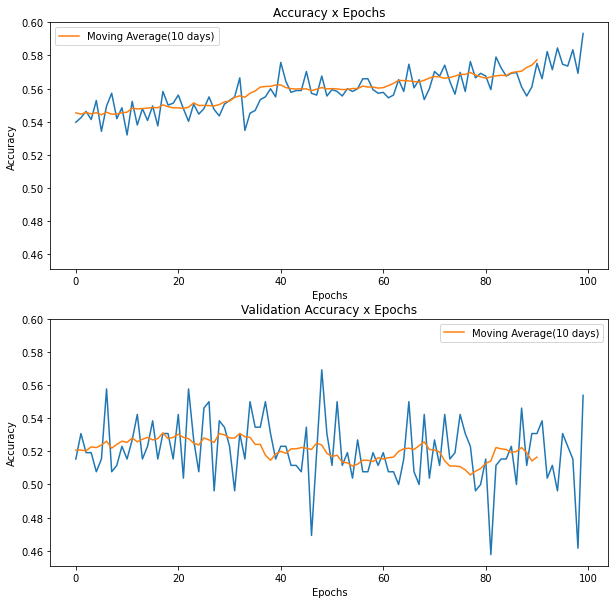

In [ ]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(10,10))

axs[0].plot(historys[2].history['accuracy'])
axs[0].plot(ma_accuracy, label='Moving Average(10 days)')
axs[0].set_title('Accuracy x Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(historys[2].history['val_accuracy'])
axs[1].set_title('Validation Accuracy x Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].plot(ma_val_accuracy, label='Moving Average(10 days)')
axs[1].legend()

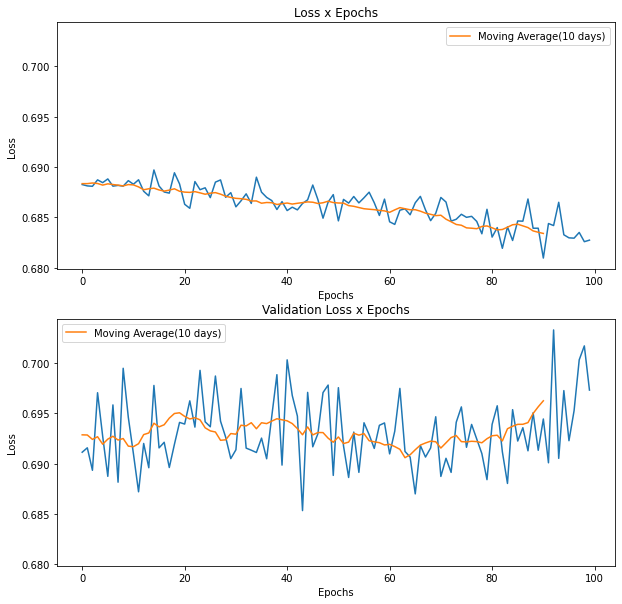

In [ ]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(10,10))

axs[0].plot(historys[2].history['loss'])
axs[0].plot(ma_loss, label='Moving Average(10 days)')
axs[0].set_title('Loss x Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(historys[2].history['val_loss'])
axs[1].set_title('Validation Loss x Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].plot(ma_val_loss, label='Moving Average(10 days)')
axs[1].legend()

## Pergunta 1
Comparar a Rede com Persistence Model de 1 lag day

In [ ]:
final_accuracy = 0
for scenario in range(8):
  for Set in range(2):
    n = len(scenarios_images_labels[scenario][Set][1])
    # dia 0 persistence = dia 1 na serie temporal
    # 1 => compra
    # 0 => venda
    # serie = [1,0,1,0,0,0,1,1] =>
    # persistence = [1,0,1,0,0,0,1]
    persistence = []
    for i in range(1,n):
      persistence.append(scenarios_images_labels[scenario][Set][1][i-1])

    accuracy = 0
    for i in range(len(persistence)):
      if persistence[i] == scenarios_images_labels[scenario][Set][1][i+1]:
        accuracy += 1
    accuracy /= len(persistence)
    final_accuracy += accuracy

final_accuracy /= 16
print(final_accuracy)


# scenarios_images_labes = [scenario1, scenario2, ... , scenario8]
# scenario = [conjunto de treino, conjunto de teste]
# conjunto de treino = [imagens, labels]
# conjunto de teste = [imanges, labels]

0.4697128402522012


In [ ]:
Open = df['Abertura'].values
Close = df['Último'].values
High = df['Máxima'].values
Low = df['Mínima'].values

In [ ]:
scenarios_Close = []
scenarios_Open = []

indexes = [ 0, 260, 521, 782, 1043, 1305, 1566, 1827, 2086, 2348, 2609, 2870, 3130, 3391, 3652, 3913, 4174, 4435, 4695, 4879]

for i in range(6):
  train = Close[indexes[3*i]:indexes[3*i+3]]
  test = Close[indexes[3*i+3]:indexes[3*i+4]]
  scenarios_Close.append([train, test])

  train = Close[indexes[3*i]:indexes[3*i+3]]
  test = Close[indexes[3*i+3]:indexes[3*i+4]]
  scenarios_Open.append([train, test])

for i in range(2):
  train = Close[indexes[3*i]:indexes[3*i+3]]
  test = Close[indexes[3*i+3]:indexes[3*i+4]]
  scenarios_Close.append([train, test])

  train = Close[indexes[8*i]:indexes[8*i+8]]
  test = Close[indexes[8*i+8]:indexes[8*i+11]]
  scenarios_Open.append([train, test])

In [ ]:
# scenario_test_2days = [ [Images[indexes[0]:indexes[7]], labels_2days[indexes[0]:indexes[7]]] ,
#                         [Images[indexes[7]:indexes[8]], labels_2days[indexes[7]:indexes[8]]] ]
                 

In [ ]:
# scenarios_images_labels_2days = []
# indexes = [ 0, 260, 521, 782, 1043, 1305, 1566, 1827, 2086, 2348, 2609, 2870, 3130, 3391, 3652, 3913, 4174, 4435, 4695, 4879]

# for i in range(6):
# #     scenarios_images_labels.append([Images[indexes[3*i]:indexes[3*i+3]],labels[indexes[3*i+3]:indexes[3*i+4]]])
#     train = [Images[indexes[3*i]:indexes[3*i+3]],labels[indexes[3*i]:indexes[3*i+3]]]
#     test = [Images[indexes[3*i+3]:indexes[3*i+4]] , labels[indexes[3*i+3]:indexes[3*i+4]]]
#     scenarios_images_labels_2days.append([train, test])
    
# for i in range(2):
# #     scenarios_images_labels_2days.append([Images[indexes[8*i]:indexes[8*i+8]],labels[indexes[8*i+8]:indexes[8*i+11]]])
#     train = [Images[indexes[8*i]:indexes[8*i+8]],labels[indexes[8*i]:indexes[8*i+8]]]
#     test = [Images[indexes[8*i+8]:indexes[8*i+11]] , labels[indexes[8*i+8]:indexes[8*i+11]]]
#     scenarios_images_labels_2days.append([train, test])

In [ ]:
import sklearn
from sklearn.linear_model import LinearRegression

In [ ]:
def shift_data(data, days_to_shift):
  shifted = []
  n = len(data)
  for i in range(n-days_to_shift):
    shifted.append(data[i+days_to_shift])
  
  return shifted

In [ ]:
x = [1,2,3,4,5]

print(shift_data(x,2))

[3, 4, 5]


In [ ]:
len(Close)

4898

In [ ]:
Close_03 = Close[18:]
Open_03 = Open[18:]

In [ ]:
X = []
for i in range(len(Close_03)-3):
  X.append([Close_03[i+2],Close_03[i+1],Close_03[i]])

In [ ]:
y = Close_03[3:-2]
y

array([1.0324, 1.0292, 1.0257, ..., 1.1594, 1.1607, 1.1626])

In [ ]:
X[0:5]

[[1.0316, 1.0312, 1.0265],
 [1.0324, 1.0316, 1.0312],
 [1.0292, 1.0324, 1.0316],
 [1.0257, 1.0292, 1.0324],
 [1.0335, 1.0257, 1.0292]]

In [ ]:
X_train = X[0:3000]
y_train = y[0:3000]
X_test = X[3000:]
y_test = y[3000:]

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)



LinearRegression()

In [ ]:
predictions_Close = linear_model.predict(X_test)

In [ ]:
X = []
for i in range(len(Open_03)-3):
  X.append([Open_03[i+2],Open_03[i+1],Open_03[i]])

In [ ]:
y = Open[3:-2]
y

array([1.0137, 1.0143, 1.0057, ..., 1.156 , 1.1594, 1.1604])

In [ ]:
X_train = X[0:3000]
y_train = y[0:3000]
X_test = X[3000:]
y_test = y[3000:]

len(X_test)

1877

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)



LinearRegression()

In [ ]:
predictions_Open = linear_model.predict(X_test)
len(predictions_Open)

1877

In [ ]:
AR_labels = []

for day in range(len(predictions_Close)-1):
    if predictions_Close[day+1] - predictions_Open[day+1] > 0:
        AR_labels.append(1)
    else:
        AR_labels.append(0)

In [ ]:
accuracy = 0
for i in range(len(AR_labels)):
  if AR_labels[i] == labels[3003:][i]:
    accuracy += 1

accuracy/1876

0.48507462686567165

## Pergunta 2

In [ ]:
labels_2days = []

for day in range(4880-2):
  label = []
  if Close[day+1] - Open[day+1] > 0:
      label.append(1)
  else:
      label.append(0)
  
  if Close[day+2] - Open[day+2] > 0:
      label.append(1)
  else:
      label.append(0)
  labels_2days.append(label)

new_labels_2days = []
for i in range(len(labels_2days)):
  if labels_2days[i] == [0,0]:
    new_labels_2days.append([1])
  elif labels_2days[i] == [1,0]:
    new_labels_2days.append([2])
  elif labels_2days[i] == [0,1]:
    new_labels_2days.append([3])
  elif labels_2days[i] == [1,1]:
    new_labels_2days.append([4])

labels_2days = np.array(new_labels_2days)

labels_2days

array([[1],
       [3],
       [2],
       ...,
       [4],
       [4],
       [4]])

In [ ]:
scenarios_images_labels_2days = []
indexes = [ 0, 260, 521, 782, 1043, 1305, 1566, 1827, 2086, 2348, 2609, 2870, 3130, 3391, 3652, 3913, 4174, 4435, 4695, 4879]

for i in range(6):
    train = [Images[indexes[2*i]:indexes[2*i+7]],labels_2days[indexes[2*i]:indexes[2*i+7]]]
    test = [Images[indexes[2*i+7]:indexes[2*i+8]] , labels_2days[indexes[2*i+7]:indexes[2*i+8]]]
    scenarios_images_labels_2days.append([train, test])
    
for i in range(2):
    train = [Images[indexes[4*i]:indexes[4*i+8]],labels_2days[indexes[4*i]:indexes[4*i+8]]]
    test = [Images[indexes[4*i+8]:indexes[4*i+10]] , labels_2days[indexes[4*i+8]:indexes[4*i+10]]]
    scenarios_images_labels_2days.append([train, test])


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(20, (2, 2), strides=1, activation='relu', input_shape=(5, 5, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.MaxPooling2D(pool_size=(2, 2), strides=(1, 1), padding='valid'))
model.add(layers.Flatten())

model.add(layers.Dense(20, activation='relu'))
model.add(layers.Dropout(.3))
model.add(layers.Dense(10, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))
model.add(layers.Dense(4, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 4, 4, 20)          100       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 2, 2, 20)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 80)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                1620      
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                      

In [ ]:
model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate=0.001),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
# history = model.fit(scenario_test_2days[0][0], scenario_test_2days[0][1], batch_size = 16, epochs=100, validation_data=(scenario_test_2days[1][0], scenario_test_2days[1][1]))

In [ ]:
historys = []
for i in range(8):
    historys.append(model.fit(scenarios_images_labels[i][0][0], scenarios_images_labels[i][0][1], batch_size = 32, epochs=100, validation_data=(scenarios_images_labels[i][1][0], scenarios_images_labels[i][1][1])))


Epoch 1/100
58/58 [==============================] - 1s 6ms/step - loss: 1.1294 - accuracy: 0.4669 - val_loss: 0.8012 - val_accuracy: 0.4749
Epoch 2/100
58/58 [==============================] - 0s 4ms/step - loss: 0.7820 - accuracy: 0.4833 - val_loss: 0.6968 - val_accuracy: 0.5212
Epoch 3/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7177 - accuracy: 0.5090 - val_loss: 0.6928 - val_accuracy: 0.5444
Epoch 4/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7164 - accuracy: 0.5085 - val_loss: 0.6921 - val_accuracy: 0.5598
Epoch 5/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7078 - accuracy: 0.5041 - val_loss: 0.6935 - val_accuracy: 0.5251
Epoch 6/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7025 - accuracy: 0.5238 - val_loss: 0.6909 - val_accuracy: 0.5251
Epoch 7/100
58/58 [==============================] - 0s 3ms/step - loss: 0.7110 - accuracy: 0.4795 - val_loss: 0.6909 - val_accuracy: 0.5251
Epoch 8/100
5

In [ ]:
data = []
for i in range(6):
  data.append([i+1,str(2000+i*2)+'-'+str(2000+i*2+7), str(2000+i*2+8),historys[i].history['accuracy'][-1], historys[i].history['val_accuracy'][-1]])
for i in range(6,8):
  data.append([i+1,str(2000)+'-'+str(2000+(i-6)*8+8), str(2000+(i-5)*8+1)+'-'+str(2000+(i-5)*8+2),historys[i].history['accuracy'][-1], historys[i].history['val_accuracy'][-1]])


In [ ]:
results_scenarios_CNN_2 = pd.DataFrame(data=data, columns=['Scenario', 'Training Data', 'Test Data', 'Train Accuracy', 'Test Accuracy'])
display(results_scenarios_CNN_2)

,Scenario,Training Data,Test Data,Train Accuracy,Test Accuracy
0,1,2000-2007,2008,0.517241,0.552124
1,2,2002-2009,2010,0.542419,0.551724
2,3,2004-2011,2012,0.548440,0.519231
3,4,2006-2013,2014,0.562192,0.471264
4,5,2008-2015,2016,0.566502,0.471264
5,6,2010-2017,2018,0.578313,0.423077
6,7,2000-2008,2009-2010,0.539310,0.544933
7,8,2000-2016,2017-2018,0.591279,0.511494


In [ ]:
results_scenarios_CNN_2[['Train Accuracy','Test Accuracy']].describe()

,Train Accuracy,Test Accuracy
count,8.000000,8.000000
mean,0.555712,0.505639
std,0.023643,0.046641
min,0.517241,0.423077
25%,0.541642,0.471264
50%,0.555316,0.515363
75%,0.569455,0.546631
max,0.591279,0.552124


In [ ]:
x = np.array(historys[2].history['loss'])
ma_loss = moving_average(x, 10)

x = np.array(historys[2].history['val_loss'])
ma_val_loss = moving_average(x, 10)

x = np.array(historys[2].history['accuracy'])
ma_accuracy = moving_average(x, 10)

x = np.array(historys[2].history['val_accuracy'])
ma_val_accuracy = moving_average(x, 10)




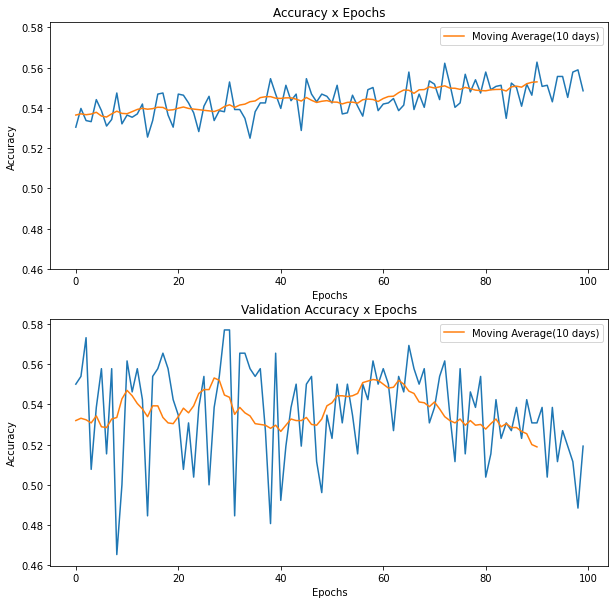

In [ ]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(10,10))

axs[0].plot(historys[2].history['accuracy'])
axs[0].plot(ma_accuracy, label='Moving Average(10 days)')
axs[0].set_title('Accuracy x Epochs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Accuracy')
axs[0].legend()

axs[1].plot(historys[2].history['val_accuracy'])
axs[1].set_title('Validation Accuracy x Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].plot(ma_val_accuracy, label='Moving Average(10 days)')
axs[1].legend()


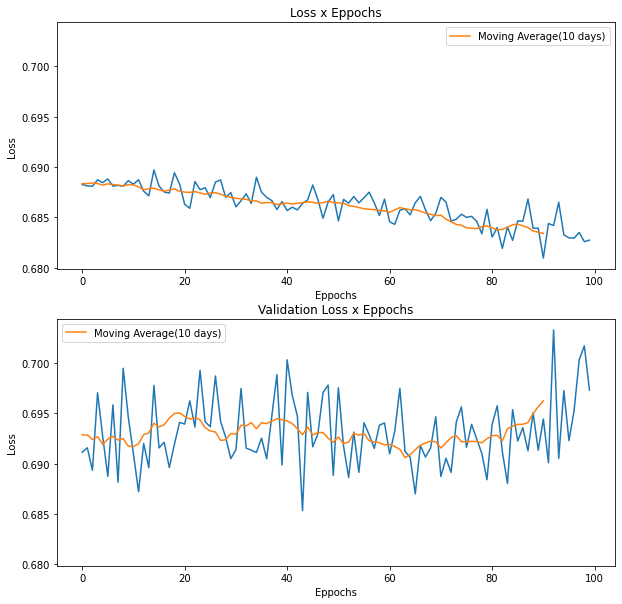

In [ ]:
fig, axs = plt.subplots(2, 1, sharey=True, figsize=(10,10))

axs[0].plot(historys[2].history['loss'])
axs[0].plot(ma_loss, label='Moving Average(10 days)')
axs[0].set_title('Loss x Eppchs')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend()

axs[1].plot(historys[2].history['val_loss'])
axs[1].set_title('Validation Loss x Epochs')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Loss')
axs[1].plot(ma_val_loss, label='Moving Average(10 days)')
axs[1].legend()